# Capstone -- 1

### Introduction

The objective of this project examines the effects of user engagement after seeing Ad A or Ad B

### Problem
An advertising company has developed a new ad to have users engage with their questionnaire. The company has shown the new ad to some users and a dummy ad to others and wants their data analyst team to interpret the results. Does the new ad generate more responses to their questionnaire? Is it statistically significant? Is the company justified in using the new ad? 

A/B testing is common in the business world and is a way to compare two versions of something to figure out which performs better. Figuring out which ad users prefer is a real life business problem that would be expected to know how to solve as a business data analyst. 

### Dataset

Found on kaggle from an advertising company. https://www.kaggle.com/osuolaleemmanuel/ad-ab-testing

 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

## Section 1 
> * Load the data
> * Get Basic information such as column descriptions and types
> * Get initial statistical information to compare when table is changed
> * Change as many generic column datatypes to a specific datatype

In [2]:
df_adSmartABdata = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')

In [3]:
# Get an intial look at the data
df_adSmartABdata.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
# Get the total number of rows 
print("Total number of rows = ", df_adSmartABdata.shape)

Total number of rows =  (8077, 9)


In [5]:
# Get a description of all the columns
df_adSmartABdata.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 3.1 MB


In [6]:
# Get the basic statistics to compare when the data is changed.
statistics_original = df_adSmartABdata.describe()
statistics_original

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [7]:
# Convert the columns that are object to a specific type so the 
# developer can use and specific functions of the type itself.
#
#
df_adSmartABdata.auction_id = df_adSmartABdata.auction_id.astype(dtype='string')
df_adSmartABdata.experiment = df_adSmartABdata.experiment.astype(dtype='string')
df_adSmartABdata.date = pd.to_datetime(df_adSmartABdata.date)
df_adSmartABdata.device_make = df_adSmartABdata.device_make.astype(dtype='string')
df_adSmartABdata.browser = df_adSmartABdata.browser.astype(dtype='string')

In [8]:
df_adSmartABdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   string        
 1   experiment   8077 non-null   string        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   string        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   string        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), string(4)
memory usage: 568.0 KB


In [9]:
statistics_new = df_adSmartABdata.describe()
statistics_original

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [10]:
# Purpose to validate that dataset has not changed.
statistics_new.sum().sum() == statistics_original.sum().sum()

True

## Section that will show the count for values for certain columns

This information may be used later, but I want to put it in the area 
where I was initially looking at the data

In [11]:
# Show types for column experiment
df_adSmartABdata.experiment.value_counts()

control    4071
exposed    4006
Name: experiment, dtype: Int64

In [12]:
# Show value counts for device_make.  Wante to show them all to verify there were no 
# make sure there were no missing vlaues ( user could have used NA, ? etc...)
# missing values
# df_adSmartABdata.device_make.value_counts().head(10)
pd.set_option("display.max_rows", None)

count_frame = pd.DataFrame()
count_frame[0] = df_adSmartABdata.device_make.value_counts()
count_frame.rename(columns={0:'Count'}, inplace=True)
count_frame

,Count
Generic Smartphone,4743
iPhone,433
Samsung SM-G960F,203
Samsung SM-G973F,154
Samsung SM-G950F,148
Samsung SM-G930F,100
Samsung SM-G975F,97
Samsung SM-A202F,88
Samsung SM-A405FN,87
Samsung SM-J330FN,69


In [13]:
# Show value for browser.  The column needs to be fixed since there is wrong data.
# An example is # facebook is not a browser
df_adSmartABdata.browser.value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: Int64

In [14]:
# Shows the ads views during specific hours -- Note that the 3PM is
# 4 times higher than every other datapoint.
pd.DataFrame(df_adSmartABdata['hour'].value_counts()).sort_index()

,hour
0,194
1,222
2,230
3,266
4,281
5,302
6,327
7,381
8,394
9,346


## Analysis of section 1
The goal of section was to load the data and perform an initial analysis.  Changed the generic datatypes to specific datatypes to match the data in the column.

### Discrepancies in the data
> * hour -- stores hours in military time ( 0-23).  It did not state in the documentation explicity 
> * platform_os -- Is just a number for this dataset.  There is no documentation about what it means
> * browser -- Some of this data may inaccurate since facebook was considered a browser, but is an application
> * "yes" and "no" -- It mentioned in different place, but if both are 0 then no data was entered
> * hour -- 1500 is showing 3 times more than any other.  Could a lot
of people be using the site or could this be DDOS Attack or something else.

### Enhancements
> * experiment -- Can be transformed into a category.  For further processing down the road, I might provide a function to convert the column to a category
> * "yes" and "no" Can be transformed  into a category.  For further processing down the road, I might provide a function to convet the column to a category


## Data Cleanup

In [15]:
df_adSmartABdata_cleanup = df_adSmartABdata.copy()

### Step 1 -- Check for unique data
There is nothing to do for this section since there is no way to know if a dupliate happen.  There is only one id.

You could backtrack through the logs match a HTTP Request with an auction id and then 
try to piece together where they cam and remove duplicates that way.

### Step 2 -- Check for missing values

After examining the data I have decided to add the empty string check
dataframe to make sure that experiment and browser columns did not have any empty string .  The isna does not check for empty strings.

When exploring the data above I looked at all the values of the "device" column to verify there were no missing values.

In [16]:
df_adSmartABdata_cleanup.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [17]:
df_adSmartABdata_cleanup.eq('').sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

### Step 3 -- Outliers
Even though I don't see how they can be outlier in this dataset.  I do want to check the possibility since it may show fradulent activty or
Human Error

The difference between the earliest and latest date is about week which seem plausible, but I would check with people who created the 
survey.

In [18]:
print("The min date is " + str(df_adSmartABdata_cleanup.date.min()))
print("The max data is " + str(df_adSmartABdata_cleanup.date.max()))

The min date is 2020-07-03 00:00:00
The max data is 2020-07-10 00:00:00


In [19]:
statistics_cleanup_table = df_adSmartABdata_cleanup.describe()
statistics_new == statistics_cleanup_table

,hour,platform_os,yes,no
count,True,True,True,True
mean,True,True,True,True
std,True,True,True,True
min,True,True,True,True
25%,True,True,True,True
50%,True,True,True,True
75%,True,True,True,True
max,True,True,True,True


# Analysis of Cleanup section.
The data was clean and there were no surpises which is fantastic.

1. There were no duplicates

2. There were no outliers since all the important information seem valid.  The dates of survey were all done in the same week and all the data important ( yes and no columns ) only could have 0 or 1 for each cell.

Since I believed there were no outliers was the so I decided to check for any other signs of fradulant activity.  The only problem I found was that hour 15 had 1895 values which was 6 times higher than all the others.

My next question about hour 15. Is this just a large amount of people filling out the survey?  The two possibilities I thought of were a DDOS attack or a group that had an 
interest in having company pick the wrong course of action.

> Was there a DDOS attack?  I would alert the security team and/or check the following: were addresses sending too many connection requests or were there a lot of 503 errors and other checks.

> The next question would be if the data was coming from the same place.  An example would be a competing company trying to convince my company that the worst choice is the best choice or it could be a student using the survey to study some tools that he is interest in such as Selenium ( A tools that provides the simulation of mouse click and text entry to test a website).

# Initial Analysis

In this section the purpose is to get an idea of how the  data is 
balanced.


In [20]:
df_analysis = pd.DataFrame(columns=['Experiment', 'Yes', 'No', 'Not Answered'])

row = []
row.append("All Rows ( Control and Exposed)")
row.append(df_adSmartABdata_cleanup.query(" yes == 1").count()[0])
row.append(df_adSmartABdata_cleanup.query(" no == 1").count()[0])
row.append(df_adSmartABdata_cleanup.query(" yes == 0 and no == 0").count()[0])
df_analysis.loc[0] = row

row = []
row.append("Control")
row.append(df_adSmartABdata_cleanup.query(" yes == 1 and experiment == 'control'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" no == 1 and experiment == 'control'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" yes == 0 and no == 0 and experiment == 'control'").count()[0])
df_analysis.loc[1] = row

row = []
row.append("Exposed")
row.append(df_adSmartABdata_cleanup.query(" yes == 1 and experiment == 'exposed'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" no == 1 and experiment == 'exposed'").count()[0])
row.append(df_adSmartABdata_cleanup.query(" yes == 0 and no == 0 and experiment == 'exposed'").count()[0])
df_analysis.loc[2] = row

df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


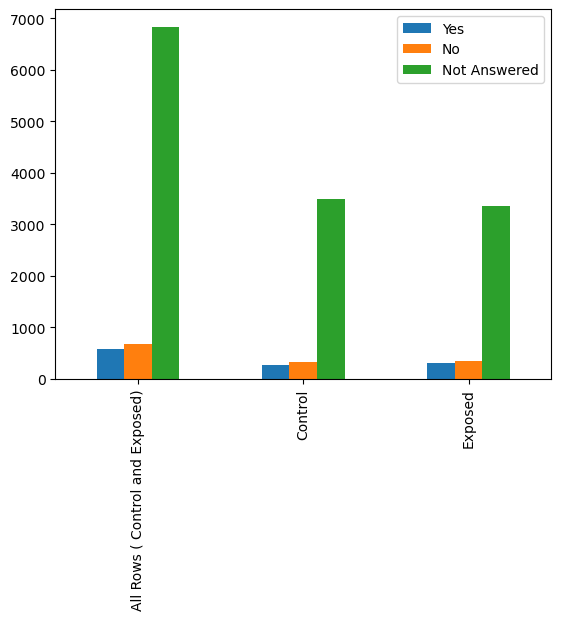

In [33]:
def showCounts():
    ax = df_analysis.plot.bar()
    ax.set_xticklabels(df_analysis.Experiment)
    ax.plot()
showCounts()

In [22]:
df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


## Modeling A/B Testing

### Just in case these definition leak into my writing
Clicks -- Number of people who like the dadd
Impressions -- Total Number of people who saw the ad.
Control Through r = 100 * Clicks / impressions

<b>This test measures the impact on say yes verus no</b>

Common A/B Test Metric -- I have chosen "The Click Through Rate" since since that seems to be closley related to our problem so two sample Z-Test can be sued

The metric which is the percentage of people who view this page and those that actually click the ad.  The clik event must click event occur independently for the control and 
exposed ad

Do the clicks happen independently? Yes, The ads are being show to 2 dojoint set of users there is no overlap at all.  From the wording in the problem statement the users are totally separated in to groups  without any interaction 

We are using testing if there is a statistically significant different between the control
and experiment group's metrics.

> Hypothesis 0 : P(Control) = P(Experiment)
> * The new add did not make a significient difference

> Hypothesis 1 : P(Control) < P(Experiment)
> * Showing the exposed ad has a difference

### Get the counts 

The count that will be used are the counts the end with the suffix "_yes" and the total
rows in the Yes Column and the total number of row in the no column

In [23]:
# Raw Data -- Just getting the values ready to be processed
control_yes = df_analysis[df_analysis.Experiment == 'Control'].Yes.item()
control_no  = df_analysis[df_analysis.Experiment == 'Control'].No.item()
exposed_yes = df_analysis[df_analysis.Experiment == 'Exposed'].Yes.item()
exposed_no  = df_analysis[df_analysis.Experiment == 'Exposed'].No.item()

# Get total amount of click for Yes and no
n_total_sample_for_control = control_yes + control_no
n_total_sample_for_exposed = exposed_yes + exposed_no

# Show the data in a table to make it easier to read.
counts = pd.DataFrame(columns=\
   ["Control_Yes", "Control_No", 
    "Exposed_Yes", "Exposed_No", 
    "Total Samples for Yes", "Total Samples for No"], 
                      data = [[control_yes, control_no, exposed_yes, 
                               exposed_no, n_total_sample_for_control, 
                               n_total_sample_for_exposed]])
counts

,Control_Yes,Control_No,Exposed_Yes,Exposed_No,Total Samples for Yes,Total Samples for No
0,264,322,308,349,586,657


### Select your alpha significance

The probability of rejecting the null hypothesis when it is true.  The smaller the aplha significance the less chance of rejecting the null hypothesis.

In [24]:
alpha = .05

### Estimate probability of Yes/No clicks of control and exposed group

In [25]:
p_control_estimated = np.round( control_yes / n_total_sample_for_control, 4)
p_exposed_estimated = np.round( exposed_yes / n_total_sample_for_exposed, 4)

estimated_probability_df = pd.DataFrame(
    data=[[p_control_estimated, p_exposed_estimated]],
    columns=["Yes Clicks for Control Group", "Yes Clicks for Exposed Group"],)
print("Estimated Probabilities")
estimated_probability_df

Estimated Probabilities


,Yes Clicks for Control Group,Yes Clicks for Exposed Group
0,0.4505,0.4688


### Get the pooled probability, variance and Standard Error

Since we are testing for the difference in these probabilities, we need to obtain an 
estimate for the pooled probability of the clicks on the orginal ad and the new ad.

Standard Deviation measure the varibility around the mean within one smaple<br>
Standard Error mesasures the varibility around thte mean across multiple samples

In [26]:
total_sample_set = n_total_sample_for_control + n_total_sample_for_exposed 
print("total sample set:",total_sample_set)

# Get an estimated probability for the population of yes clicks over the sample set
pooled_probability_yes = np.round((control_yes + exposed_yes ) / total_sample_set,3)
print("pooled probability of yes for control and exposed:",pooled_probability_yes)

# Get the effective for variance ( whcih distribution are we using?)
pooled_variance = pooled_probability_yes * ( 1 - pooled_probability_yes) * \
                                            ( 1/control_yes + 1/control_no)
pooled_variance = np.round(pooled_variance,3)
print("pooled variance:",pooled_variance)

# Get the Stnadard Error 
pooled_standard_error = np.round(np.sqrt(pooled_variance), 3)
print("pooled_standard_error:",pooled_standard_error)

total sample set: 1243
pooled probability of yes for control and exposed: 0.46
pooled variance: 0.002
pooled_standard_error: 0.045


### Get Test Statitics 

Test Statstics

> A number calculated by a statistical test. It describes how far your  observed data is from the null hypothesis of no relationship between variables or no  difference among sample groups.

> Summarizes your observed data into a single number using the central tendency
variation and sample size and number of predictor variables (features) in you statistical 
model. 

Z-Critical 

>  A point that cuts off area under the standard normal distribution. Critical value of z can tell what probability any particular variable will have.

Norm.ppf
> Taks a percentage under the standard normal distribution curve and returns a standard 
> deviation multiplier. A normal random continuous value using the Percent Point Function  > which is the cumulative distribution function.



In [27]:
test_statistic = ( p_control_estimated - p_exposed_estimated ) / pooled_standard_error
test_statistic = np.round(test_statistic, 4)
print("Test Statistic = ", test_statistic)

# alpha divided by two means  there a normal distribution that is symmetric
z_critical = np.round(norm.ppf(1 - alpha / 2),4)
print("Z-Critical = ", z_critical)

Test Statistic =  -0.4067
Z-Critical =  1.96


### Caluclate the Margin of Error, P_Value

Margin of error 
> The margin of error in statistics is the degree of error in results received from random sampling surveys. A higher margin of error in statistics indicates less likelihood of relying on the results of a survey or poll

P-Value
> statistical measurement used to validate a hypothesis against observed data. A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference. Help decide whether to reject the null hypothesis.  The smaller the 
p value, the more likely you are to reject the null hypothesis.

norm.sf -- Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

In [28]:
margin_of_error = np.round(pooled_standard_error * z_critical,3)
print("margin of error:", margin_of_error)

# two-sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = np.round(norm.sf(test_statistic)*2,4)
print("The P-Value is:", p_value)

margin of error: 0.088
The P-Value is: 1.3158


### Calculate confidence interval

Confidence Interval 
> A confidence interval is the mean of your estimate plus > and minus the variation in that estimate. This is
> the range of values you expect your estimate to fall between if you redo your test

In [29]:
p_hat = p_control_estimated - p_exposed_estimated
confidence_level  = [p_hat - pooled_standard_error * z_critical, \
                     p_hat + pooled_standard_error * z_critical] 
confidence_level = np.round(confidence_level, 4)
print("confidence level ", confidence_level)


confidence level  [-0.1065  0.0699]


### Analyze the results

In [30]:
# The analysis of the z-score
z_critical = np.abs(z_critical)
rejection = test_statistic >= z_critical
print("rejection is ", rejection)

if rejection:
    print("reject the null hypothesis")
else: 
    print("failed to reject the null hypothesis")


rejection is  False
failed to reject the null hypothesis


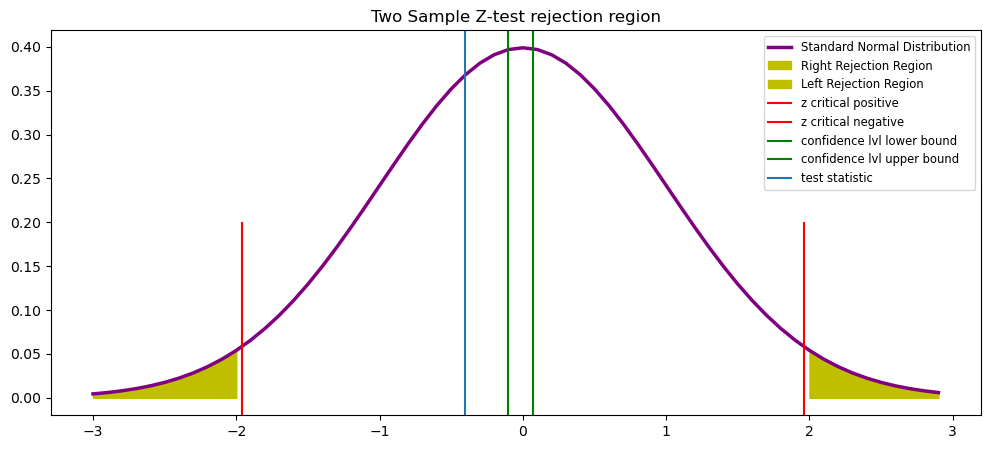

In [31]:
# Retrieved this code from Magnimind Academy

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>z_critical], norm.pdf(z[z>z_critical]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*z_critical], norm.pdf(z[z<(-1)*z_critical]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")

# My changes to the code
plt.axvline(z_critical, color="r", label="z critical positive", ymax=.5 )
plt.axvline(-1 *z_critical, color="r", label="z critical negative", ymax=.5 )
plt.axvline(confidence_level[0], color="g", label="confidence lvl lower bound")
plt.axvline(confidence_level[1], color="g", label="confidence lvl upper bound")
plt.axvline(test_statistic, label="test statistic")
plt.legend(fontsize="small")
plt.show()

## Question 2

The inpact on the campaign on someone taking an action vs not doing anything. I believe 
the question is being asked is if the survey 

The two groups that I have choosen
> * The group who did not complete the survey
> * The group who did complete the survey

    Hypothesis 0 : The survey did not have an effect on the decision: Group 1 = Group 2
    Hypothesis 1 : The survey did have an effect on the decision: Group 1 != Group 2
        
My strategy is based on the following information.  I do not know how to an AB Test with
Unbalanced data.  So, here are my thoughts.

> After doing research ( here is my notes ):  From March 2nd a conversation with Dr. Yasin
I am working on the  part where we handle the question about the unbalanced dataset
My best answer came from s://www.researchgate.net/post/Can_someone_suggest_a_statistical_test_to_be_applied_on_unbalanced_panel_data
It was given Paul Louangrath ( Search for his name ).  He provides the way to get z_score and I can get the z_critical by using alpha.
In summary this section provides the following advice:  Discrete Data. Now if the data is dichotomous, the test turns to binomial distribution test. One population binomial distribution test may be given by: Is this answer correct or should I be doing something else?

> Yasin -- 4:00 PM
yes that looks right and this is what we are computing with 4:01
python code in the file I shared with you

Based on this information my plan is to calculate the test statistic using the following 
equation is (5)   Z = (p - p0) / sqrt(p0(1 - P0) / n) where 
> * p is the observed proportion of specified class; 
> * * p will be the number of surveys filled out
> * p0 = proportion of class of interest in the population; 
> * * p0 will be (the number of sruveys filled out) / total amount of surveys
> * n = sample size. Assuming that the data reading is taken at the same time. 
>
> Preconditions:
> * If the data is taken at two separate time reading, i.e. pre- and post-introduction of stimulus then a Z-test for two counts Poisson distribution is used. From the stated facts, "... divided into two groups depending on presence or absence of independent variable ...
> * it appears you have dichotomous data: presence = yes and non-presence = no; therefore, yes = 1 and no =0. Otherwise, follow the non-discrete routine.

2nd Try 

Thanks to Soudeh I have am going to try undersampling means get a random sample 
of the set with the most items that matches the size of the set with least items



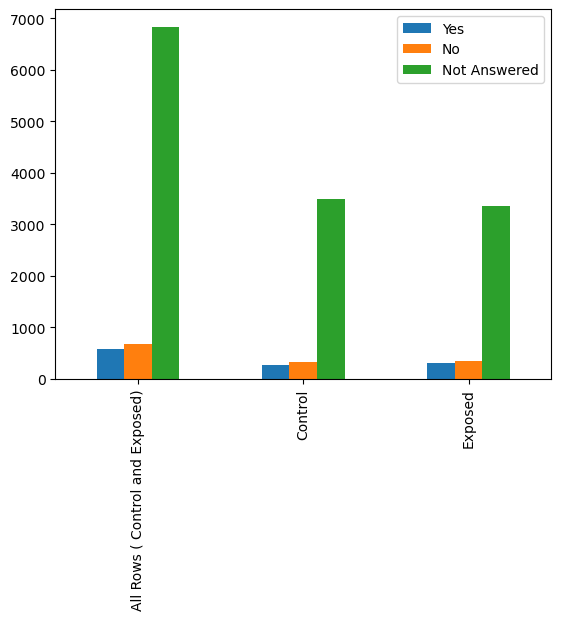

In [34]:
# To show the data is inbalanced a function is being called from the intial analysis
showCounts()

In [38]:
df_analysis

,Experiment,Yes,No,Not Answered
0,All Rows ( Control and Exposed),572,671,6834
1,Control,264,322,3485
2,Exposed,308,349,3349


In [ ]:
### Select your alpha significance
alpha = .05

In [104]:
#########################################################
# Raw Data -- Just getting the values ready to be processed
#########################################################
survey_completed = df_analysis.Yes[0] + df_analysis.No[0]

# Here survey not completed will be the same size as survey completed -- Undersampling
#
survey_not_completed = survey_completed

# Get total amount of click for Yes and no
n_total_survey = survey_completed + survey_not_completed


# # Show the data in a table to make it easier to read.
# counts = pd.DataFrame(columns=\
#    ["Control_Yes", "Control_No", 
#     "Exposed_Yes", "Exposed_No", 
#     "Total Samples for Yes", "Total Samples for No"], 
#                       data = [[control_yes, control_no, exposed_yes, 
#                                exposed_no, n_total_sample_for_control, 
#                                n_total_sample_for_exposed]])

In [105]:
# Estimate the probability of the Completed and Non Completed froms
p_completed_estimated = np.round( survey_completed / n_total_survey, 4)
p_not_completed_estimated = np.round( survey_not_completed / n_total_survey, 4)

estimated_probability_df2 = pd.DataFrame(
    data=[[p_completed_estimated, p_not_completed_estimated]],
    columns=["Survy Completed", "Survey Not Completed"])
print("Estimated Probabilities")
estimated_probability_df2

Estimated Probabilities


,Survy Completed,Survey Not Completed
0,0.5,0.5


In [109]:
# Get an estimated probability 
pooled_probability_completed = np.round( p_completed_estimated / n_total_survey,3)
print("Probability survey completed:",pooled_probability_yes)

# Get the effective for variance ( whcih distribution are we using?)
pooled_variance = pooled_probability_completed * ( 1 - pooled_probability_completed) * \
                                            ( 1/survey_completed + 1/survey_not_completed)
pooled_variance = np.round(pooled_variance,3)
print("pooled variance:",pooled_variance)

# Get the Stnadard Error 
pooled_standard_error = np.round(np.sqrt(pooled_variance), 3)
print("pooled_standard_error:",pooled_standard_error)

Probability survey completed: 0.46
pooled variance: 0.0
pooled_standard_error: 0.0


In [120]:
# Get the statistic that will allow use to determine if the hypothesis should
# be rejected or not.
test_statistic = ( p_completed_estimated - p_not_completed_estimated) /\
    np.sqrt(p_completed_estimated - p_not_completed_estimated / n_total_survey)
test_statistic = np.round(test_statistic, 4)
print("Test Statistic = ", test_statistic)

# alpha divided by two means  there a normal distribution that is symmetric
z_critical = np.round(norm.ppf(1 - alpha / 2),4)
print("Z-Critical = ", z_critical)

Test Statistic =  0.0
Z-Critical =  1.96


In [121]:
# Calculate the margin of error and the p value
margin_of_error = np.round(pooled_standard_error * z_critical,3)
print("margin of error:", margin_of_error)

# two-sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = np.round(norm.sf(test_statistic)*2,4)
print("The P-Value is:", p_value)

margin of error: 0.0
The P-Value is: 1.0


In [122]:
p_hat = p_completed_estimated
confidence_level  = [p_hat - pooled_standard_error * z_critical, \
                     p_hat + pooled_standard_error * z_critical] 
confidence_level = np.round(confidence_level, 4)
print("confidence level ", confidence_level)

confidence level  [0.5 0.5]


In [123]:
# Analyze the Results
# The analysis of the z-score
z_critical = np.abs(z_critical)
rejection = test_statistic >= z_critical
print("rejection is ", rejection)

if rejection:
    print("reject the null hypothesis")
else: 
    print("failed to reject the null hypothesis")

rejection is  False
failed to reject the null hypothesis


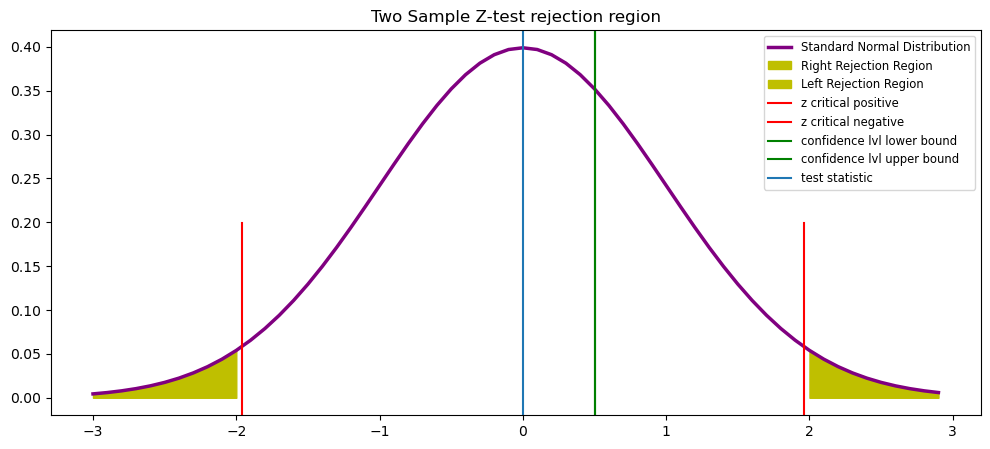

In [124]:
# Retrieved this code from Magnimind Academy

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>z_critical], norm.pdf(z[z>z_critical]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*z_critical], norm.pdf(z[z<(-1)*z_critical]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")

# My changes to the code
plt.axvline(z_critical, color="r", label="z critical positive", ymax=.5 )
plt.axvline(-1 *z_critical, color="r", label="z critical negative", ymax=.5 )
plt.axvline(confidence_level[0], color="g", label="confidence lvl lower bound")
plt.axvline(confidence_level[1], color="g", label="confidence lvl upper bound")
plt.axvline(test_statistic, label="test statistic")
plt.legend(fontsize="small")
plt.show()